# Amazon Recommendation System - Lab

## Introduction
In this lab, we are going to use Amazon Product Co-purchase data to make Book Recommendations using Social Network Analysis Techniques. We shall make use of the concepts covered in this section towards centrality and clustering dynamics of a graph. In particular, we'll make use of the "Island Method" for networks analysis to split the huge graph into smaller islands for identifying similarity between books. 

## Objectives
You will be able to: 

* Read and manipulate graph data and get it ready for analysis
* Apply Network Analysis and graph dynamics concepts to analyze complex networks
* Build a recommendation system using the graph data for complex networks

## Graph Based Recommendation Systems 
From purchase suggestions on e-commerce websites to content customization on multimedia platforms, recommendation systems happen to be more and more widespread among the web. Modern companies such as Facebook, Netflix, Amazon all develop their own, aiming to propose items or contents which are more personalized and relevant to their users.

We have seen that in graph data, information entities are stored as nodes, which are linked together by edges showing some sort of association between these entities. This allows to easily retrieve knowledge about mutual relationships between nodes. Therefore, graphs are useful to describe systems of strongly connected entities, such as social networks, pages on a website, co-operation of any kind between associated entities etc. This feature of graph processing can be used to build efficient Recommendation systems (also known as Recommender Systems).








In this lab, we shall build a straightforward recommender system taking advantage of a graph analysis. 

Following shows an example of movie ratings by a specific user for different movies he has purchased, viewed in the form of graph. [Click here to see more on this experiment](https://www.kernix.com/blog/an-efficient-recommender-system-based-on-graph-database_p9). We shall build a similar system later in the course with a much bigger and complex dataset. 


<img src="rs1.png" width=600>

## Amazon Co-purchase Dataset


This project will use a preprocessed version of Amazon Meta-Data Set maintained on the Stanford Network Analysis Project (SNAP) website. The original data was collected by crawling Amazon website and contains product metadata and review information about 548,552 different products (Books, music CDs, DVDs and VHS video tapes). [Click here to visit the official site](https://snap.stanford.edu/data/amazon-meta.html). This and other similar datasets have been used massively for marketing analytics, customer segmentations and building recommendation systems. 

### Original Dataset Statistics 

**Co-purchase Statistics**

- Products	548,552
- Product-Product Edges	1,788,725
- Reviews	7,781,990
- Product category memberships	2,509,699
- Products by product group	

**Item Frequency**
- Books	393561
- DVDs	19828
- Music CDs	103144
- Videos	26132


The Co-purchase meta dataset is almost 1GB in raw format as shown below:

#### Example Record
```
Id:   15
ASIN: 1559362022
  title: Wake Up and Smell the Coffee
  group: Book
  salesrank: 518927
  similar: 5  1559360968  1559361247  1559360828  1559361018  0743214552
  categories: 3
   |Books[283155]|Subjects[1000]|Literature & Fiction[17]|Drama[2159]|United States[2160]
   |Books[283155]|Subjects[1000]|Arts & Photography[1]|Performing Arts[521000]|Theater[2154]|General[2218]
   |Books[283155]|Subjects[1000]|Literature & Fiction[17]|Authors, A-Z[70021]|( B )[70023]|Bogosian, Eric[70116]
  reviews: total: 8  downloaded: 8  avg rating: 4
    2002-5-13  cutomer: A2IGOA66Y6O8TQ  rating: 5  votes:   3  helpful:   2
    2002-6-17  cutomer: A2OIN4AUH84KNE  rating: 5  votes:   2  helpful:   1
    2003-1-2   cutomer: A2HN382JNT1CIU  rating: 1  votes:   6  helpful:   1
    2003-6-7   cutomer: A2FDJ79LDU4O18  rating: 4  votes:   1  helpful:   1
    2003-6-27  cutomer: A39QMV9ZKRJXO5  rating: 4  votes:   1  helpful:   1
    2004-2-17  cutomer:  AUUVMSTQ1TXDI  rating: 1  votes:   2  helpful:   0
    2004-2-24  cutomer: A2C5K0QTLL9UAT  rating: 5  votes:   2  helpful:   2
    2004-10-13 cutomer:  A5XYF0Z3UH4HB  rating: 5  votes:   1  helpful:   1
    ```



## Pre-processed Dataset.

In this experiment, we will use a pre-processed version of the dataset, with only the information about co-puchases in category __Books__. You are encouraged to download the original dataset (or try different such datasets) to build your own custom recommendation systems. Remember, the information in this dataset was collected in 2006 and is a bit outdated to be used within a practical system today.

Our new dataset has following files and formats. 
- `books_meta.txt`
- `books_data.edgelist`

Below we shall look at how these files are structured and parse them accordingly. 

## `books_meta.txt`

In this file we have the meta information about individual books as records. Part of this information is provided in the original dataset and some attributes have been added which might become useful for building our recommendation system. Let's look at what this file contains. 

### Features from original dataset:
- __Id__: Indexing field
- __ASIN__:  Amazon Standard Identification Number
- __Title__: Complete title of the book
- __Catagories__: Categories to which a book belongs to
- __Group__: All records in our preprocessed dataset belong to single category "Book"
- __SalesRank__: Amazon sales rank or Best seller rank (BSR) helps a seller to determine the sales performance of a certain product within a particular category. Graded on a bell curve, every Amazon product has a numerical sales ranking where lower numbers are more profitable.
- __TotalReviews__: Total number product reviews by the user
- __AvgRatings__: Average Rating given by users

### Engineered Features 

For this lab, we have following features, engineered from the co-purchase data. 

- __DegreeCentrality__: Degree Centrality of each item based on co-purchases
- __ClusteringCoeff__: As we saw earlier, this described the extent to which neighbors of a node are each other's neighbors as well; i.e. How often the items bought with this item were bought together. 

#### ASIN
> ASIN stands for Amazon Standard Identification Number. It's a 10-charcter alphanumeric unique identifier that's assigned by Amazon.com and its partners. It's used for product-identification within Amazon.com organization. ASINs are only guaranteed unique within a marketplace

Here is an example of the record in this file:

```
1	0827229534	Patterns of Preaching: A Sermon Sampler	clergi sermon subject religion preach spiritu christian book	Book	396585	2	5.0	8	0.8

```

## Task 1:  Read `books_meta.txt` 

- Read the data from the `books_meta.txt` as detailed below:

This is not a standard csv file, its a tsv (a tab delimited file).Due to the fact that books have variable number of categories, a csv file may have records showing different numbers of attributes, which is not ideal. Here categories are split by normal space and next attribute is a tab space. (open the file to view records under header). 

- Open the file and parse it line by line , splitting attributes on TAB (shown in python as `\t`)

- Store the parsed data into a new nested dictionary `books_meta_dict` in following format:

    - Set `ASIN` as they key for each dictionary entry and `meta` as value. The `meta` value should contain following metadata entries from original data as key value pairs.

    - key = `meta`,
        values = 
            - Id 
            - Title
            - Ctagories
            - Group
            - SalesRank
            - TotalReviews
            - AvgRatings
            - DegreeCentrality
            - ClusteringCoeff
    
__Expected output format__ (Remember order of k:v pairs does not matter)
```
{'0827229534': {'AvgRating': 5.0,
  'Categories': 'clergi sermon subject religion preach spiritu christian book',
  'ClusteringCoeff': 0.8,
  'DegreeCentrality': 8,
  'Group': 'Book',
  'Id': '1',
  'SalesRank': 396585,
  'Title': 'Patterns of Preaching: A Sermon Sampler',
  'TotalReviews': 2}
  ```
  
- Show the length of new dictionary 

In [1]:
fhr = open('books_meta.txt', 'r', encoding='utf-8', errors='ignore')
books_meta_dict = {}
fhr.readline()

# Parse data from each ASIN entry
for record in fhr:
  
  # Split the record attributes on TAB 
  attr = record.split('\t')
  
  # Create a meta dictionary 
  meta = {}
  
  # Read the attributes into key = ASIN , value= meta - where meta is a dictionary of attributes (except ASIN)
  meta['Id'] = attr[0].strip() 
  ASIN = attr[1].strip()
  meta['Title'] = attr[2].strip()
  meta['Categories'] = attr[3].strip()
  meta['Group'] = attr[4].strip()
  
  # Convert numeric data to integers and floats accordingly
  meta['SalesRank'] = int(attr[5].strip())
  meta['TotalReviews'] = int(attr[6].strip()) 
  meta['AvgRating'] = float(attr[7].strip())
  meta['DegreeCentrality'] = int(attr[8].strip()) 
  meta['ClusteringCoeff'] = float(attr[9].strip())
  
  # Write metadata as value with key ASIN
  books_meta_dict[ASIN] = meta

# Close the file reader
fhr.close()
len(books_meta_dict)

393561

## `books_data.edgelist`

This file contains an edge list connecting together all the books (as nodes) that were co purchased. The books are shown as `ASIN` number.  


As we saw earlier, first two columns of this dataset contain the node information and a third column to show weight of the edges as a measure of __normalized category similarity__ between ASINs. These weights have been provided in the original dataset. 

```
0827229534 0804215715 0.7
0827229534 156101074X 0.5
0827229534 0687023955 0.8
0827229534 0687074231 0.8
0827229534 082721619X 0.7
0827229534 0805415505 0.7
.
.
```

Let's see a couple of quick examples to develop an intuition around this. 

---
__Example one:__ A strong edge weight 

>__(0804215715 0687023955 0.9)__

__0804215715__	Witness of Preaching	
Categories: ```clergi subject religion preach spiritu ritual christian book practic```

__0687023955__	The Four Pages of the Sermon: A Guide to Biblical Preaching	
Categories: ```clergi sermon subject religion preach spiritu ritual christian book practic```

---

__Example Two:__ Weak edge 

>__(0822329387 0807854603 0.18)__

__0822329387__	Materializing Democracy: Toward a Revitalized Cultural Politics (New Americanists)	
Categories: ```nonfict general subject polit govern democraci ```

__0807854603__	America's Culture of Terrorism: Violence, Capitalism, and the Written Word (Cultural Studies of the United States)

Categories: ```event general nonfict subject literatur current america unit critic state scienc social societi theori book terror histori violenc fiction	```

---
So above we see two examples with a strong edge and a weak edge which is reflected in the categories that these books belong to. Try to see some other examples from given datasets to develop this intuition further. 


## Task 2. Create weighted graph from given edgelist

- Read the data from the provided `books_data.edgelist`
- Create a __weighted and undirected__ graph object in networkx - `books_copurchase`
- Check for number of nodes and edges in the graph . 

(Warning: Don't try to visualize/draw this graph as due to the size of data, it may freeze or crash your notebook).

In [2]:
import networkx as nx

file = open("books_data.edgelist", 'rb')
books_copurchase = nx.read_weighted_edgelist(file)
file.close()
print(nx.info(books_copurchase))

Name: 
Type: Graph
Number of nodes: 270347
Number of edges: 741124
Average degree:   5.4828


So we see that there is a huge number of books and links between them. So, what good is networkx if we cant visualize big Graphs ? We will soon look into big data processing with Spark and see how such big datasets are parallelized and distributed over a clusters of many computers managed by Hadoop or Spark systems to allow visualization and processing of big graphs.  

__Question : Why do we have a higher number of books in our new dictionary THAN those in the edgelist?__

# Your answer here 

Our books that never got co-purchased with other books do not show up in the edge list

## Task 3: Let's Make A Purchase

Recommendation systems need initial set of data to make future recommendations around products, services or new edges (friends in a social network). For this, we need to select at least one book from the data and work of generating recommendations based on that purchase. 

You can refer to the `amazon-books.txt` and select a first purchase there. As we are using ASIN as a key to our books dictionary, we would need an ASIN to simulate a purchase.  

For this experiment, lets purchase the popular sci. fiction 
> __"Star Wars: Splinter of the Mind's Eye",  `ASIN = 0345320239`.__ 


__Use this ASIN to print title, salesRank, total reviews, average ratings ,degree centrality and clustering coefficient for this book__

In [3]:
# Select an ASIN as first purchase - 
# You are welcome to use your own,  just make sure that asin is present in the books file and it has some neighbors

print ("Your Purchased Book")
print ("-----------------")
asin = '0345320239'

# Print out the features associates with the book

print ("\nTitle = ", books_meta_dict[asin]['Title'])
print ("ASIN = ", asin)
print ("SalesRank = ", books_meta_dict[asin]['SalesRank'])
print ("TotalReviews = ",books_meta_dict[asin]['TotalReviews'])
print ("AvgRating = ", books_meta_dict[asin]['AvgRating'])
print ("DegreeCentrality = ", books_meta_dict[asin]['DegreeCentrality'])
print ("ClusteringCoeff = ",books_meta_dict[asin]['ClusteringCoeff'])

Your Purchased Book
-----------------

Title =  Star Wars: Splinter of the Mind's Eye
ASIN =  0345320239
SalesRank =  33004
TotalReviews =  66
AvgRating =  3.5
DegreeCentrality =  11
ClusteringCoeff =  0.63


## Task 4: Create Ego Network For Selected Book

Using the selected book (ASIN), we will now create an ego network based on co-purchases with other books. 
- Using given ASIN as the "EGO", create an ego graph from `books_copurchase` weighted graph , with radius = 1
- Print the number of nodes and edges present in this ego graph
- Draw the ego network for the book. 

In [4]:
# Get ego network of given asin at depth 1 using networkx.ego_graph package + assign to variable ego_graph
# print number of nodes and edges in ego_graph

ego = nx.ego_graph(books_copurchase, asin, radius=1)
print ("Ego Network for", books_meta_dict[asin]['Title'], 
       "\nNodes =", ego.number_of_nodes(), 
       "\nEdges =", ego.number_of_edges())

Ego Network for Star Wars: Splinter of the Mind's Eye 
Nodes = 12 
Edges = 33


In [5]:
# Draw the ego network
nx.draw(ego, with_labels=True)

C:\Users\Asad\Anaconda3\envs\learn-env\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


## Trim the Ego network

We could potentially always take ALL books that were ever co-purchased with current book, and recommend all of them. We notice that above book has a Degree Centrality of 11 i.e. 11 other Books were co-purchased with this Book by customers. 

However, the Degree Centrality of Nodes in a product Co-Purchase Network can possibly be very large, specially for a popular books. e.g. let's see it with an example
- Get the degree centrality of `ASIN=0805047905`.
- Draw an Ego network for this ASIN. 

Brown Bear, Brown Bear, What Do You See?
Degree Centrality: 216


C:\Users\Asad\Anaconda3\envs\learn-env\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


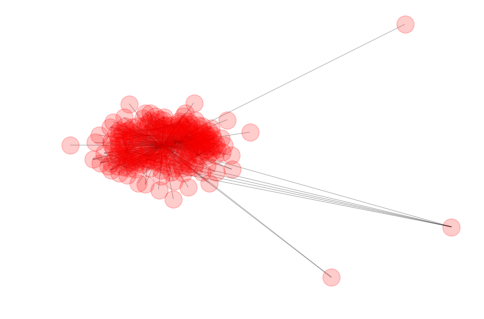

In [6]:
temp_asin = '0805047905'
print(books_meta_dict[temp_asin]['Title'])
dcl = nx.degree(books_copurchase) # Check for degree centrality 
dc = dcl[temp_asin] # Degree centrality of chosen book 
print ("Degree Centrality:", dc)
temp_ego = nx.ego_graph(books_copurchase, temp_asin, radius=1)
nx.draw(temp_ego, alpha=0.2)

Wow. For this popular children's book, the degree is very high and this will be the number of altars in the ego network. We can not possibly recommend ALL the co-purchased books, ALL the time.

__So what do we do?__ We "Trim" the Ego Network.  

We can select the altars from ego network that have a high edge weight between them and the ego. This will help us recommend books which share same categories and edge list is based on category similarity. 

> __Selecting certain nodes from an ego network , based on edge weight (or some other criterion) to reduce the size of ego network is called "Trimming the Ego Network", and the result graph structured is referred to as "Trimmed Ego Network"__ 

Perform following tasks:

- Set a threshold level = 0.5 for trimming the nodes based normalized edge weight
- Create empty graph instance `trimmed_ego` using the nx.Graph()
- Iterate through the edges of ego network created above:
    - If edge weight __is greater than__ or equal to defined threshold:
        - add both nodes (node 1, node 2) and edge weight to the `trimmed_ego` created above. 
- Print edges and nodes of the trimmed_ego_net
- Show the ASINs of the books in the trimmed network

In [7]:
# Create empty graph instance `trimmed_ego_net` using the `nx.Graph()`to represent the trimmed network
threshold = 0.5
trimmed_ego = nx.Graph()

# Iterate through the network, comparing each weight with threshold
for node1, node2, edge in ego.edges(data=True):
    if edge['weight'] >= threshold:
        trimmed_ego.add_edge(node1, node2,
                                 weight = edge.values())
        
# Print the trimmed statistics        
print ('Trimmed Ego Network for:', books_meta_dict[asin]['Title'] , 
       "\n____________________\n",
       "\nThreshold=", threshold,
       "\nNodes =", trimmed_ego.number_of_nodes(), 
        "\nEdges =", trimmed_ego.number_of_edges())

# Show the Altars available in the trimmed network
print("\nASINs in the trimmed network: \n", list(trimmed_ego))

Trimmed Ego Network for: Star Wars: Splinter of the Mind's Eye 
____________________
 
Threshold= 0.5 
Nodes = 10 
Edges = 22

ASINs in the trimmed network: 
 ['0345400771', '0553574132', '0345320239', '0345394429', '0553574175', '0553574167', '0553574159', '0345379802', '0553477455', '0553477463']


So now we have 10 nodes and 22 edges. That means we are getting 10 recommendations for the given book. You can play a bit more with the threshold value above to include and drop books from this list. We shall take these ASINs and make recommendations based on these for now. 

## Task 5: Make Recommendations

This last step is pretty straightforward. All we have to do now is using the ASINs (altars) in the trimmed ego network, we can extract book data from our `books_meta_dict` dictionary and present it to the user. 

- Create a list of ASINs present in the trimmed network
- Extract Book Title, Average Rating and Number of reviews for each ASIN and present in a nice manner as recommendations. 

In [8]:
lst_neighbors= list(trimmed_ego)
print ("Purchased Book")
print ("--------------\n")
print("Title: ",books_meta_dict[asin]['Title'])


print ("\nCustomers who bought this book, also bought:")
print ("-------------------------------------------")
for nb_asin in lst_neighbors[1:]:
    print("\nAsin: ", nb_asin)
    print("Book Title: ", books_meta_dict[nb_asin]["Title"])
    print("Average Rating:", books_meta_dict[nb_asin]["AvgRating"])
    print("Number of Reviews: ", books_meta_dict[nb_asin]["TotalReviews"])

Purchased Book
--------------

Title:  Star Wars: Splinter of the Mind's Eye

Customers who bought this book, also bought:
-------------------------------------------

Asin:  0553574132
Book Title:  Star Wars: Shadows of the Empire
Average Rating: 4.5
Number of Reviews:  325

Asin:  0345320239
Book Title:  Star Wars: Splinter of the Mind's Eye
Average Rating: 3.5
Number of Reviews:  66

Asin:  0345394429
Book Title:  Star Wars: The Han Solo Adventures (Classic Star Wars)
Average Rating: 4.0
Number of Reviews:  31

Asin:  0553574175
Book Title:  Rebel Dawn : Star Wars : The Han Solo Trilogy - Volume Three (Star Wars: Han Solo Trilogy (Paperback))
Average Rating: 4.5
Number of Reviews:  98

Asin:  0553574167
Book Title:  The Hutt Gambit (Star Wars: The Han Solo Trilogy, Vol. 2)
Average Rating: 4.5
Number of Reviews:  68

Asin:  0553574159
Book Title:  The Paradise Snare (Star Wars: The Han Solo Trilogy, Volume 1)
Average Rating: 4.5
Number of Reviews:  153

Asin:  0345379802
Book Title: 

Looking at these recommendations, we see that these are very meaningful results based on the original choice. We see recommendations for more star war books as these are very likely to be purchased together. This would surely help a customer make more informed and meaningful purchases. Thats adding value to user experience. 

<img src="rs.jpeg" width=400>
---
So there we have it, our graph based recommendation system. Its not perfect but gives you a skeleton approach that you can modify, improve in many ways. 

## Additional Resouces. 

This dataset used in this experiment was set up and introduced in the following paper focused at digital marketing. Although it is not mandatory, we would encourage you to read this paper to see how such products can become game changers for a number of data driven businesses.

http://www.cs.cmu.edu/~jure/pubs/viral-tweb.pdf

[An efficient recommender system based on graph database](https://www.kernix.com/blog/an-efficient-recommender-system-based-on-graph-database_p9)


## Summary 

In this lab, we built a recommendation system using Graph analysis techniques that we covered in this section. This is a simple recommendation system and can be improved a lot by bringing in more data i.e. user reviews, categories of books and in some cases, some manual fine tuning to create custom edges promoting recommendations. We shall look at another technique called collaborative filtering later in the course where we shall try to expand upon this experiment. 